# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

n_train = len(X_train)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
import csv
sign_names = []
with open('./signnames.csv', 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        if row[0].isdigit():
            sign_names.append(row[1])

Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})


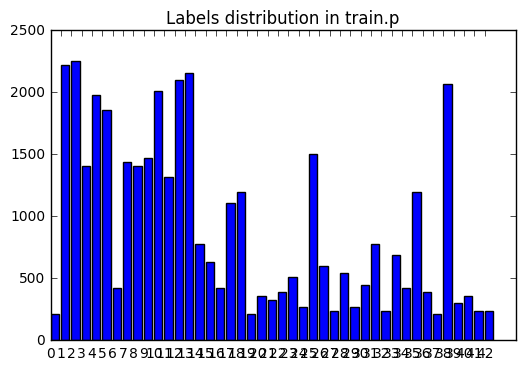

In [5]:
import numpy as np
from collections import Counter

x = np.arange(n_classes)
label_counter = Counter(y_train)
plt.title("Labels distribution in train.p")
plt.bar(x, height = label_counter.values())
plt.xticks(x, label_counter.keys());
print(label_counter)

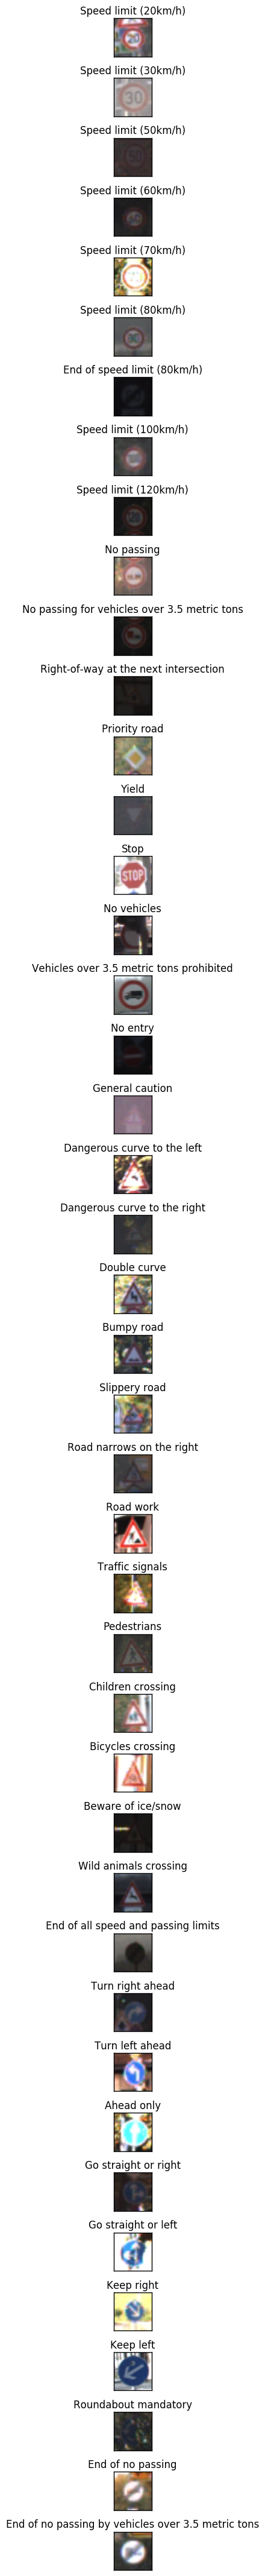

In [6]:
traffic_signs_images = []
for label in range(n_classes):
    indices = np.where(y_train == label)[0]
    traffic_signs_images.append(X_train[indices])
    
f = plt.figure(figsize=(n_classes,n_classes))
for label in range(n_classes):
    image = traffic_signs_images[label][0].squeeze()
    f.add_subplot(n_classes, 1, label + 1)
    plt.title(sign_names[label])
    plt.imshow(image)
    plt.tight_layout()
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [8]:
import random
import cv2
def random_transform(image, factor=2):
    transformed_image = image
    rows,cols,height = transformed_image.shape
    
    pt1a = [cols/2, 0]
    pt1b = [cols, 0]
    pt1c = [0, rows]

    pt2a = [pt1a[0]+random.randint(-factor, factor), pt1a[1]+random.randint(-factor, factor)]
    pt2b = [pt1b[0]+random.randint(-factor, factor), pt1b[1]+random.randint(-factor, factor)]
    pt2c = [pt1c[0]+random.randint(-factor, factor), pt1c[1]+random.randint(-factor, factor)]
    
    pts1 = np.float32([pt1a, pt1b, pt1c])
    pts2 = np.float32([pt2a, pt2b, pt2c])

    M = cv2.getAffineTransform(pts1, pts2)    
    transformed_image = cv2.warpAffine(transformed_image, M, (cols,rows))

    return transformed_image

In [12]:
new_X_train = []
new_y_train = []
for n in range(n_classes):
    images = []
    while len(images) < 2500:
        images.extend(traffic_signs_images[n])
    images = images[0:2500]
    new_X_train.extend(images)
    new_y_train.extend([n] * 2500)
    
for n in range(len(new_X_train)):
    new_X_train[n] = random_transform(new_X_train[n])

new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)

In [13]:
new_n_train = len(new_X_train)

new_image_shape = new_X_train[0].shape

new_n_classes = len(set(new_y_train))

print("Number of training examples =", new_n_train)
print("Image data shape =", new_image_shape)
print("Number of classes =", new_n_classes)

Number of training examples = 107500
Image data shape = (32, 32, 3)
Number of classes = 43


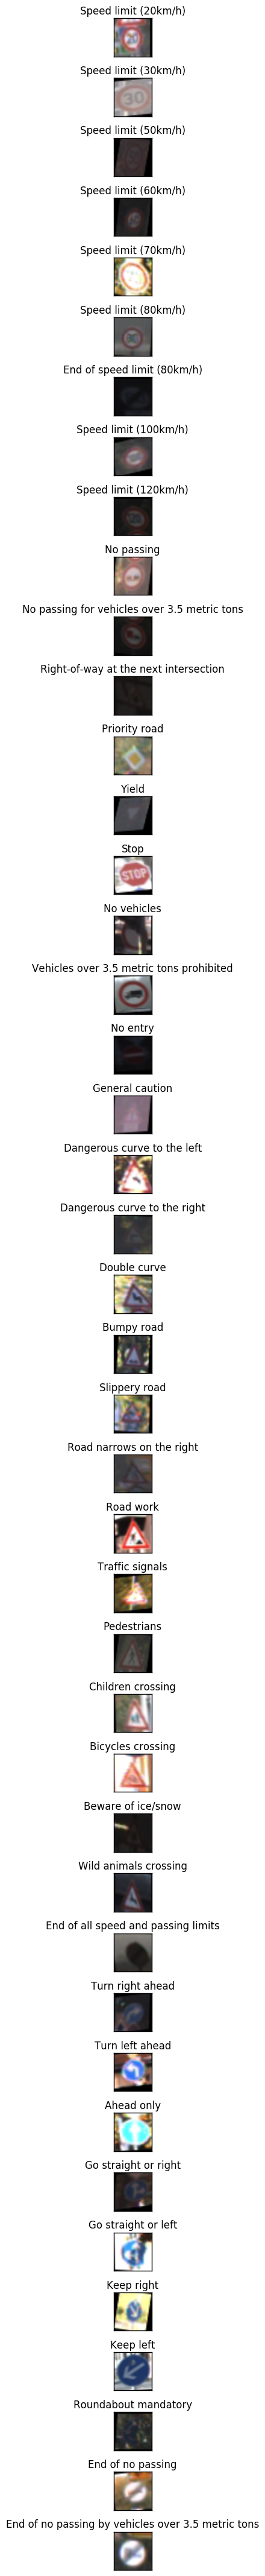

In [14]:
traffic_signs_images = []
for label in range(n_classes):
    indices = np.where(new_y_train == label)[0]
    if len(indices) == 0:
        print(label)
    traffic_signs_images.append(new_X_train[indices])
    
f = plt.figure(figsize=(new_n_classes,n_classes))
for label in range(new_n_classes):
    image = traffic_signs_images[label][0].squeeze()
    f.add_subplot(new_n_classes, 1, label + 1)
    plt.title(sign_names[label])
    plt.imshow(image)
    plt.tight_layout()
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [16]:
file = open('./traffic-signs-data/preprocessed-train.p', 'wb')

preprocessed_train = {
    'features': new_X_train,
    'labels': new_y_train}
pickle.dump(preprocessed_train, file)
file.close()